# car sale regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [9]:
data=pd.read_csv('./Car_sales (1).csv',parse_dates=['Latest_Launch'])

In [10]:
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,2011-09-21,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,2012-11-24,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2011-06-25,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,2011-04-26,101.623357


In [12]:
data['year']=data.Latest_Launch.dt.year
data['month']=data.Latest_Launch.dt.month
data['day']=data.Latest_Launch.dt.day

In [13]:
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,year,month,day
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,2012,2,2
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,2011,6,3
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,NaN,2012,1,4
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,2011,3,10
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,2011,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,2011-09-21,66.498812,2011,9,21
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,2012-11-24,70.654495,2012,11,24
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2011-06-25,71.155978,2011,6,25
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,2011-04-26,101.623357,2011,4,26


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Manufacturer         157 non-null    object        
 1   Model                157 non-null    object        
 2   Sales_in_thousands   157 non-null    float64       
 3   __year_resale_value  121 non-null    float64       
 4   Vehicle_type         157 non-null    object        
 5   Price_in_thousands   155 non-null    float64       
 6   Engine_size          156 non-null    float64       
 7   Horsepower           156 non-null    float64       
 8   Wheelbase            156 non-null    float64       
 9   Width                156 non-null    float64       
 10  Length               156 non-null    float64       
 11  Curb_weight          155 non-null    float64       
 12  Fuel_capacity        156 non-null    float64       
 13  Fuel_efficiency      154 non-null  

In [15]:
data.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
year                    0
month                   0
day                     0
dtype: int64

In [16]:
data.columns


Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor', 'year',
       'month', 'day'],
      dtype='object')

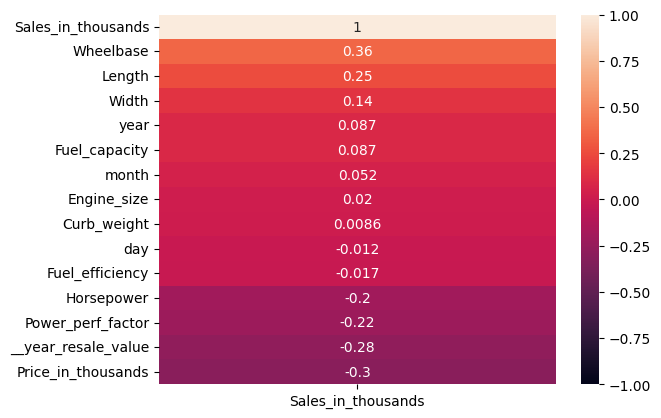

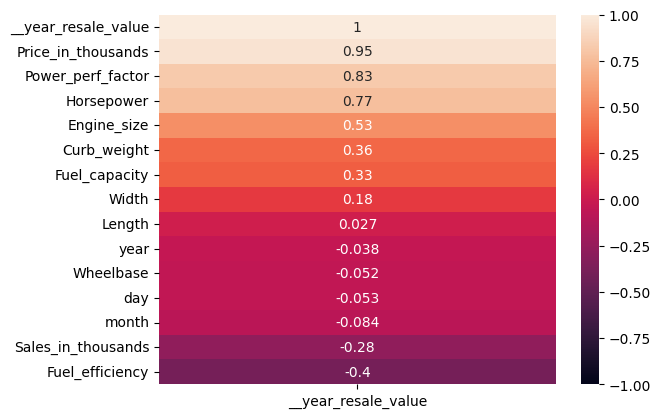

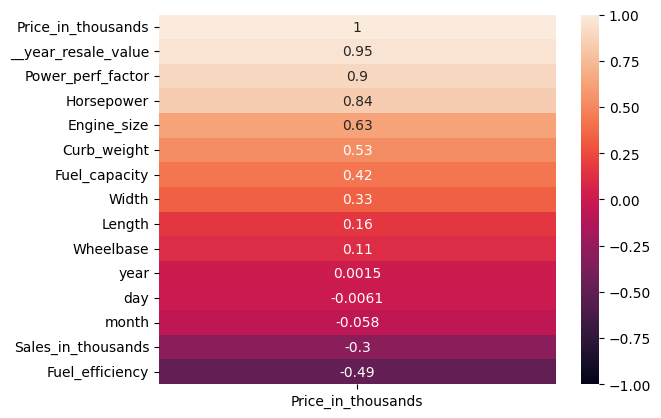

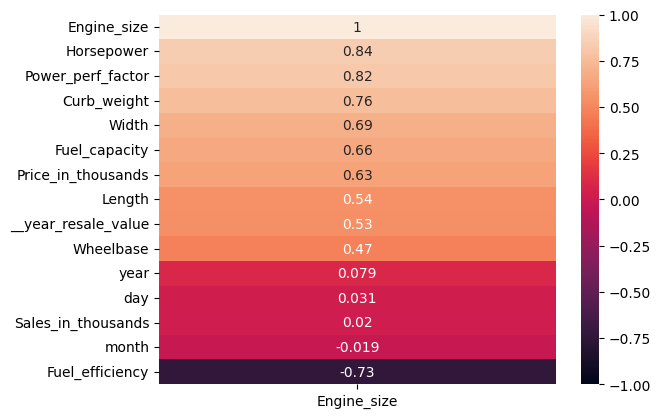

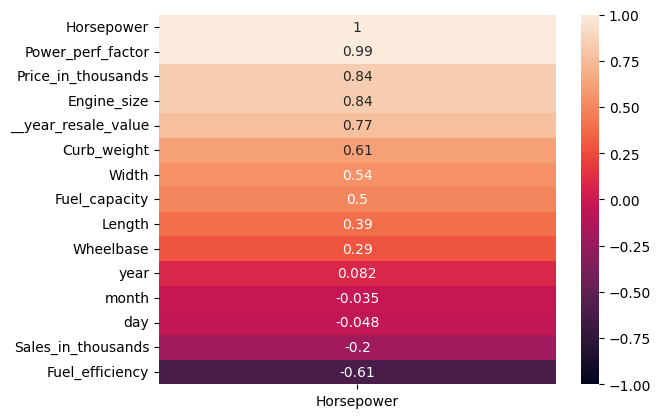

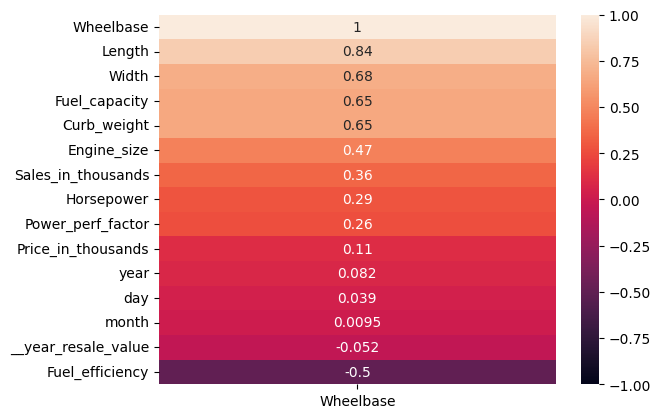

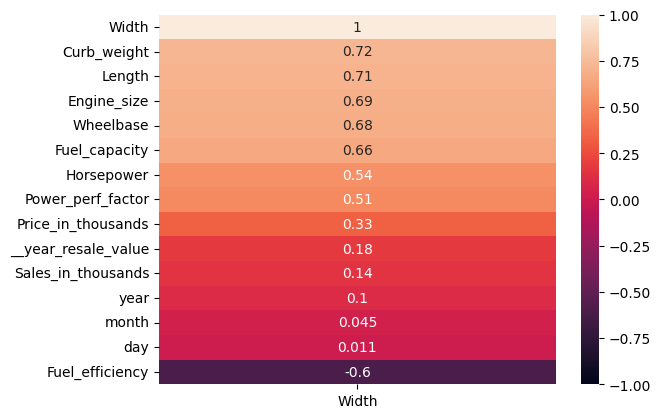

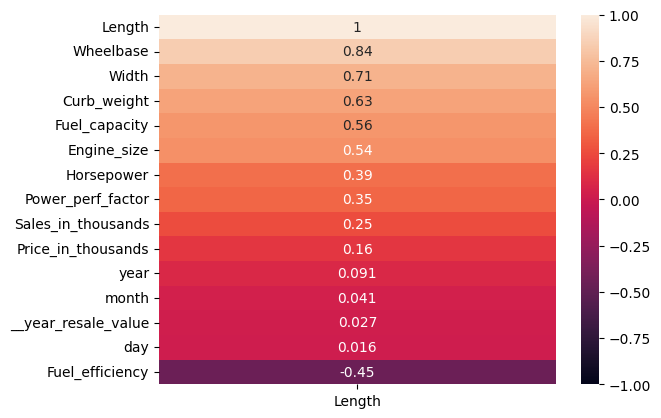

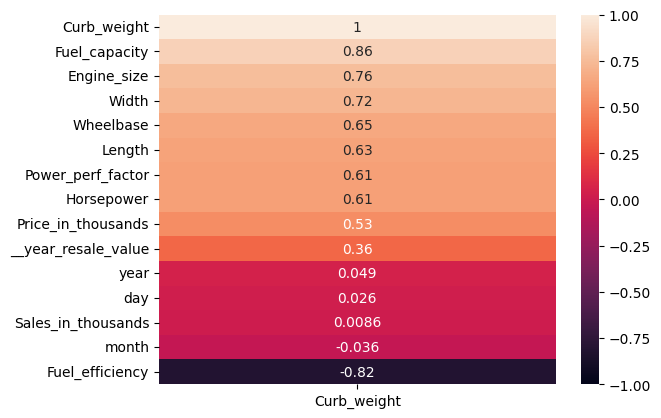

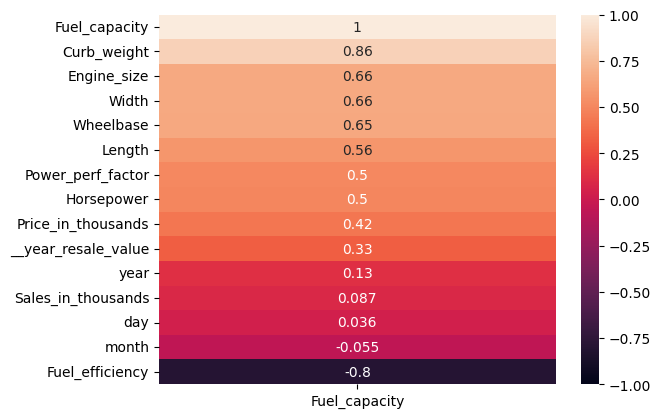

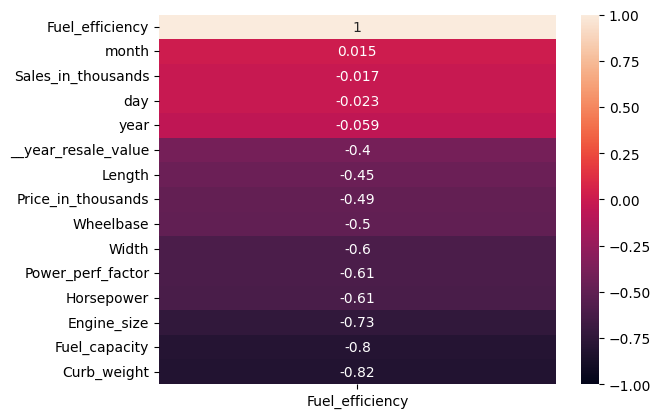

KeyError: "None of [Index(['Latest_Launch'], dtype='object')] are in the [columns]"

In [21]:
regg_heatmap=['Sales_in_thousands', '__year_resale_value',
        'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor', 'year',
       'month', 'day']
for i in regg_heatmap:
    sns.heatmap(data.corr()[[i]].sort_values(by=[i],ascending=False),vmax=1, vmin=-1,annot=True);
    plt.show()

In [22]:
data.__year_resale_value.fillna(data.__year_resale_value.mean(),inplace=True)

data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,year,month,day
0,Acura,Integra,16.919,16.360000,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,2012,2,2
1,Acura,TL,39.384,19.875000,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,2011,6,3
2,Acura,CL,14.114,18.225000,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,NaN,2012,1,4
3,Acura,RL,8.588,29.725000,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,2011,3,10
4,Audi,A4,20.397,22.255000,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,2011,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,18.072975,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,2011-09-21,66.498812,2011,9,21
153,Volvo,S70,15.245,18.072975,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,2012-11-24,70.654495,2012,11,24
154,Volvo,V70,17.531,18.072975,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2011-06-25,71.155978,2011,6,25
155,Volvo,C70,3.493,18.072975,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,2011-04-26,101.623357,2011,4,26


In [23]:
data.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     2
Engine_size            1
Horsepower             1
Wheelbase              1
Width                  1
Length                 1
Curb_weight            2
Fuel_capacity          1
Fuel_efficiency        3
Latest_Launch          0
Power_perf_factor      2
year                   0
month                  0
day                    0
dtype: int64

In [24]:
data.dropna(inplace=True)

In [25]:
data.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
year                   0
month                  0
day                    0
dtype: int64

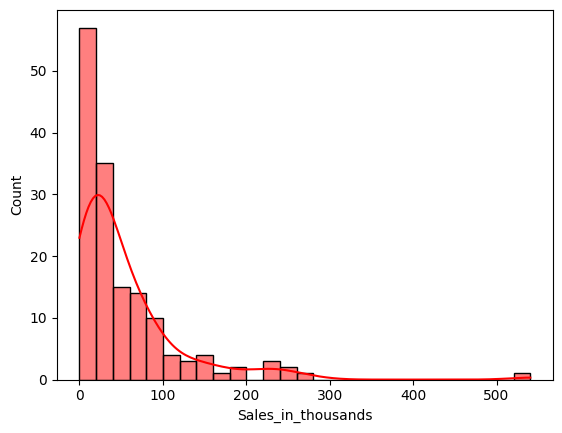

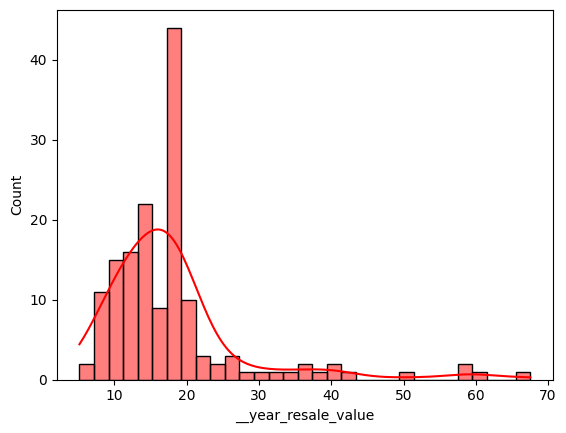

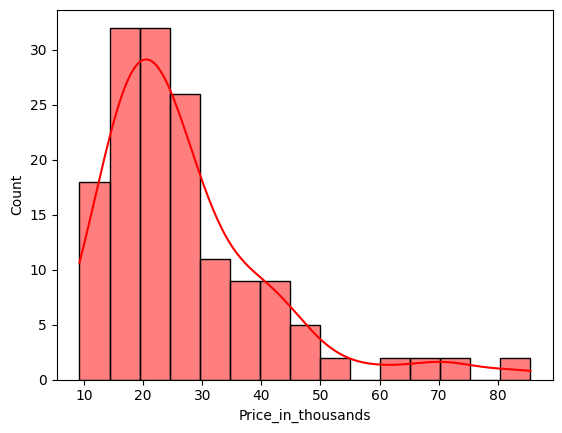

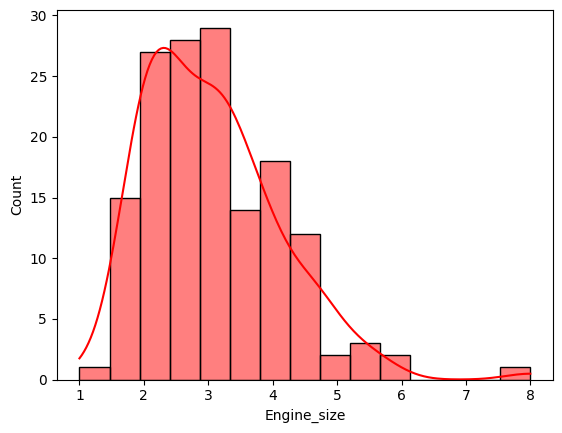

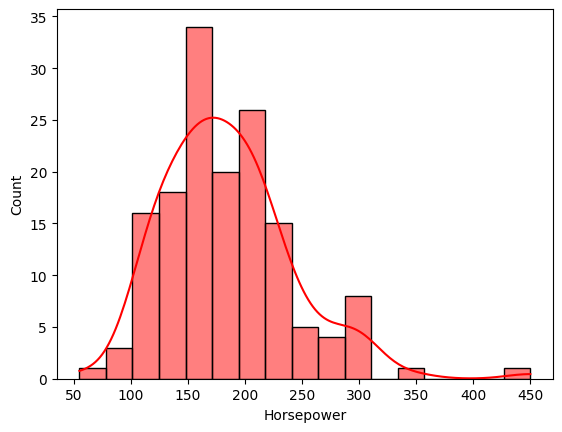

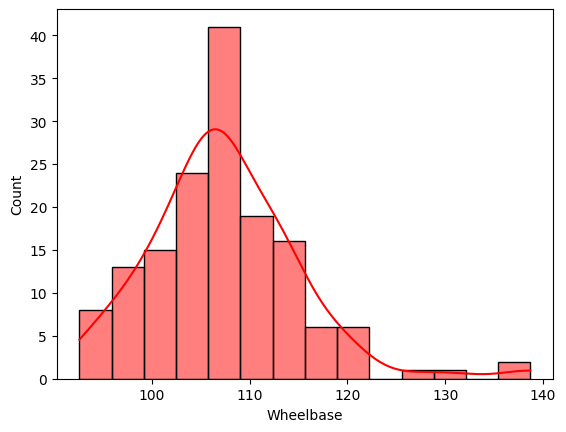

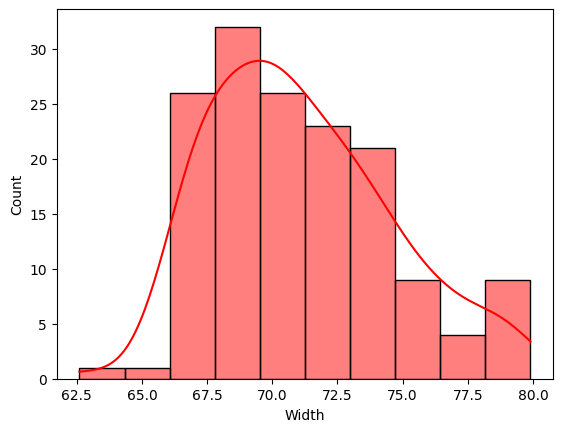

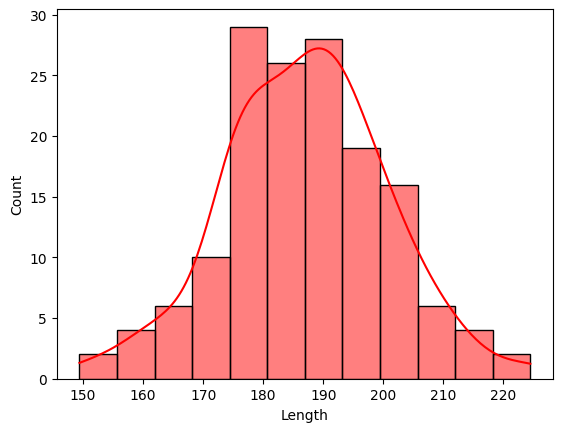

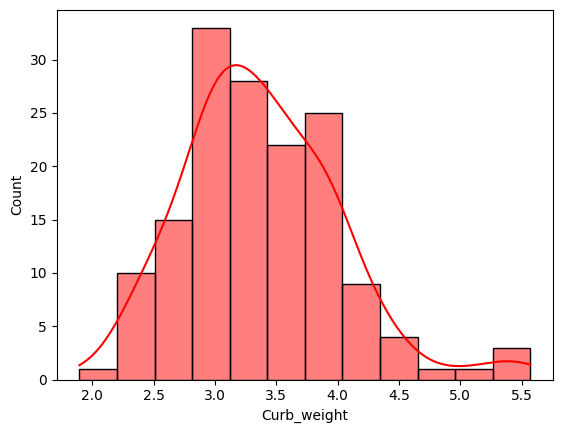

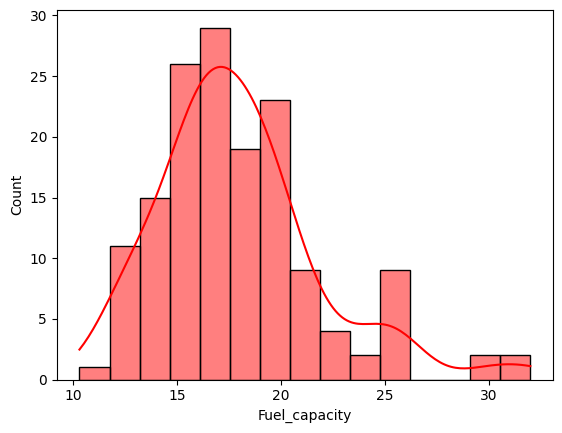

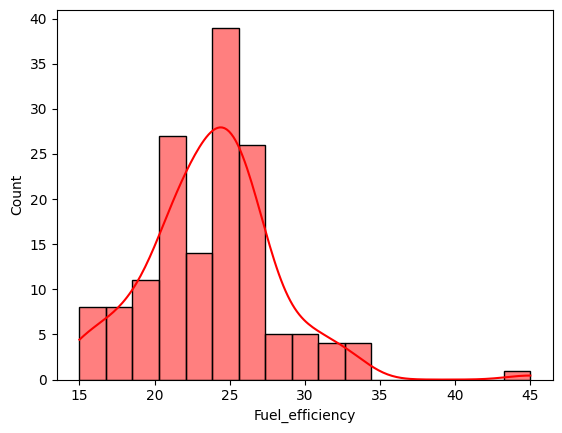

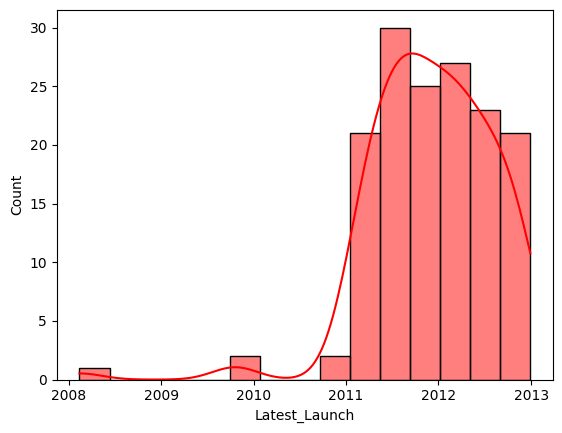

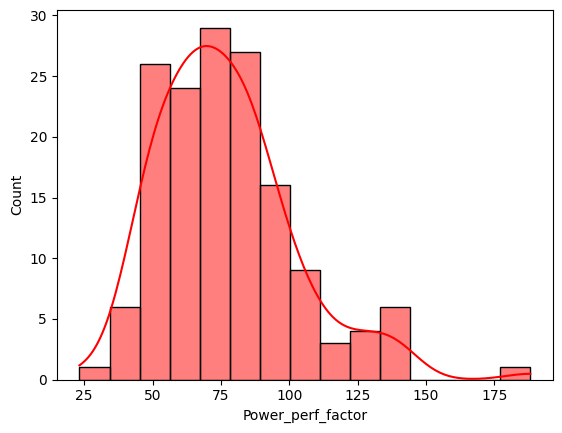

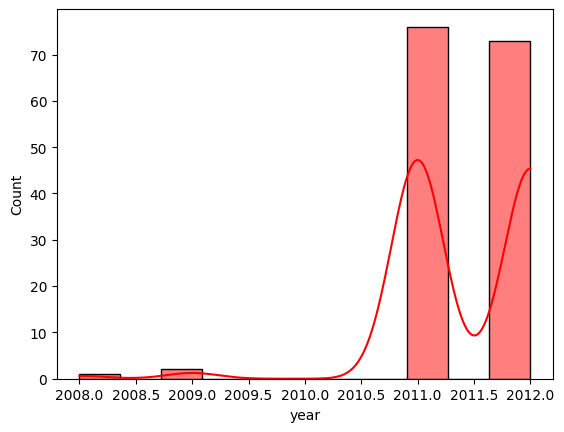

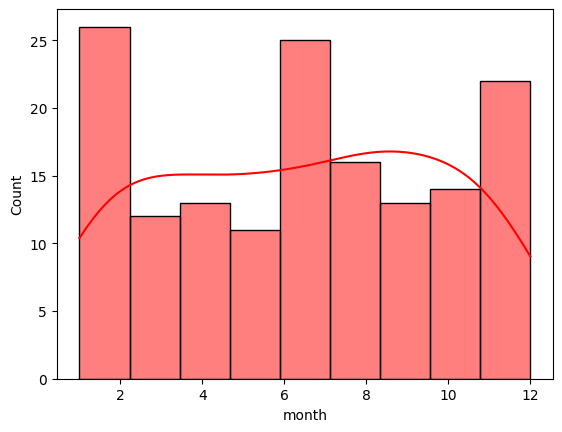

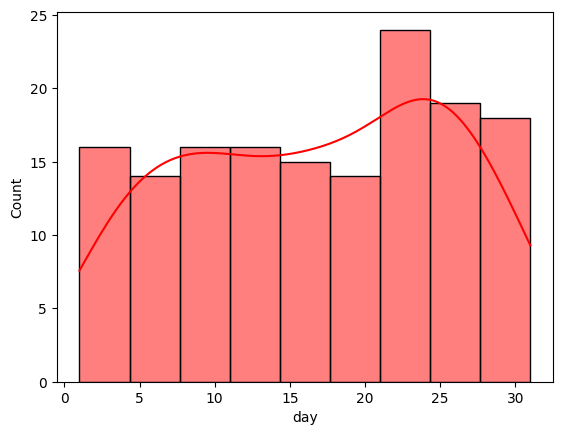

In [27]:
for i in data.columns:
    if data[i].dtypes !='object':
        sns.histplot(x=data[i],kde=True,color='red')
        plt.show()

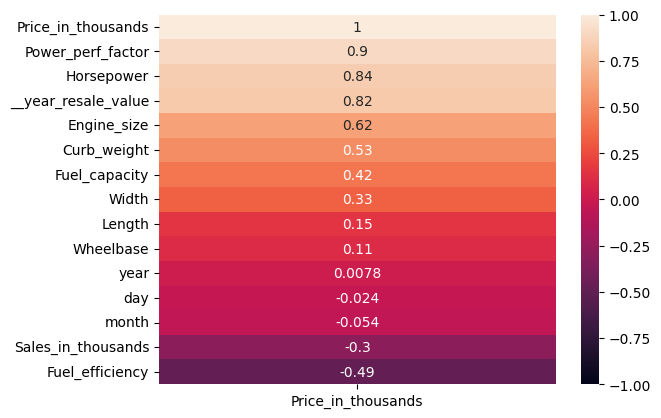

In [30]:
sns.heatmap(data.corr()[['Price_in_thousands']].sort_values(by='Price_in_thousands',ascending=False),vmax=1, vmin=-1,annot=True);

In [31]:
data.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor', 'year',
       'month', 'day'],
      dtype='object')

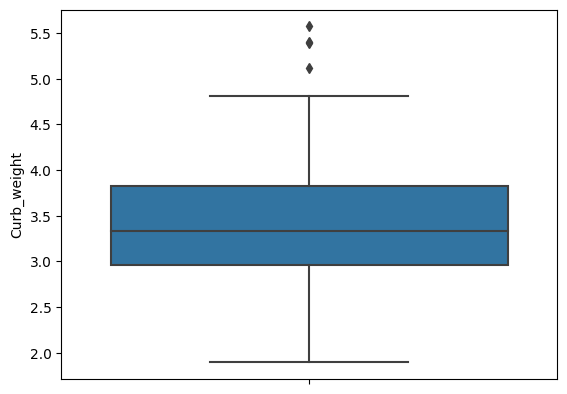

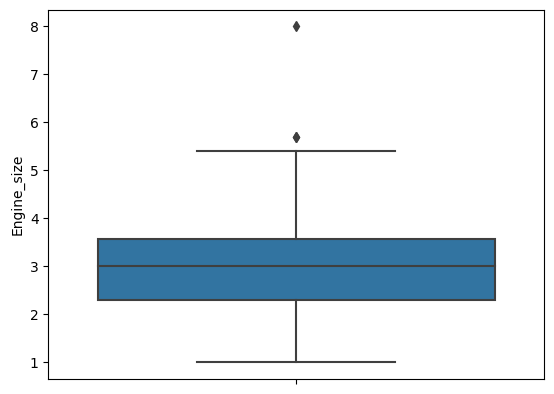

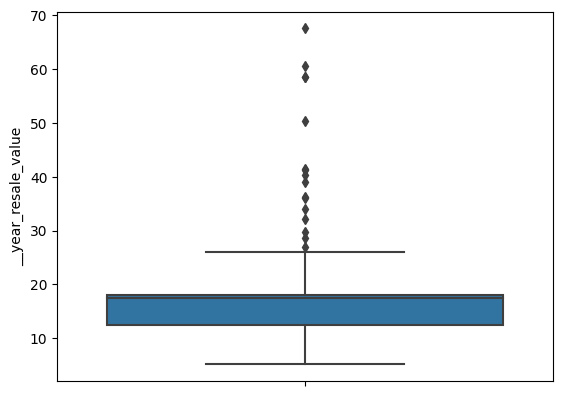

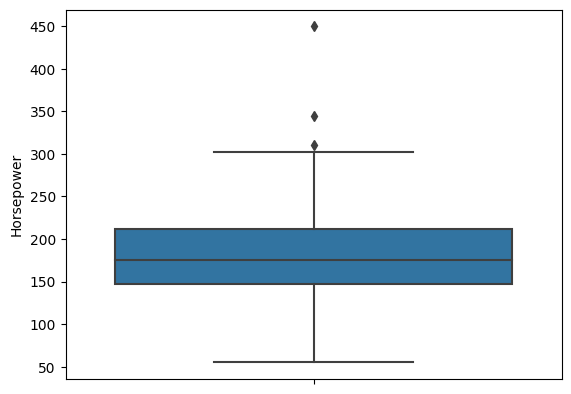

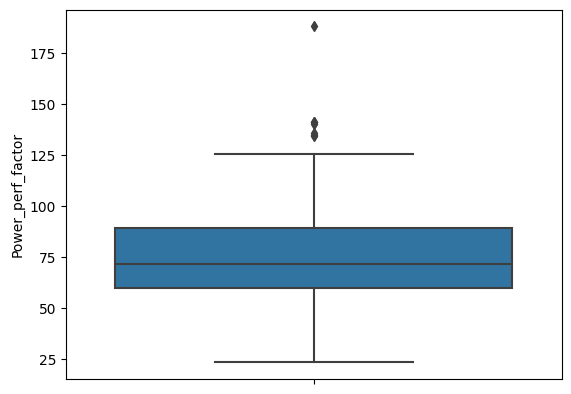

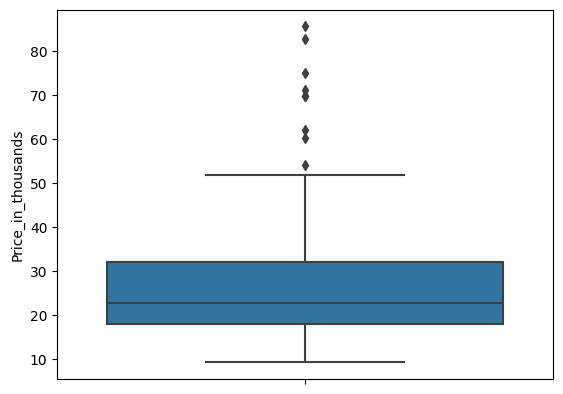

In [32]:
regg_01=['Curb_weight','Engine_size','__year_resale_value','Horsepower','Power_perf_factor','Price_in_thousands']

for i in regg_01:
    sns.boxplot(y=data[i])
    plt.show()

In [33]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR= Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [34]:
IQR_LIMIT=['Curb_weight','Engine_size','__year_resale_value','Horsepower','Power_perf_factor','Price_in_thousands']
for i in IQR_LIMIT:
    UL,LL=outlier_limit(data[i])
    data[i]=np.where((data[i]>UL)|(data[i]<LL),np.nan,data[i])

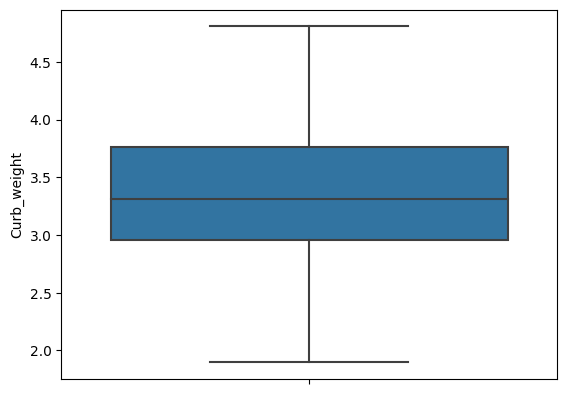

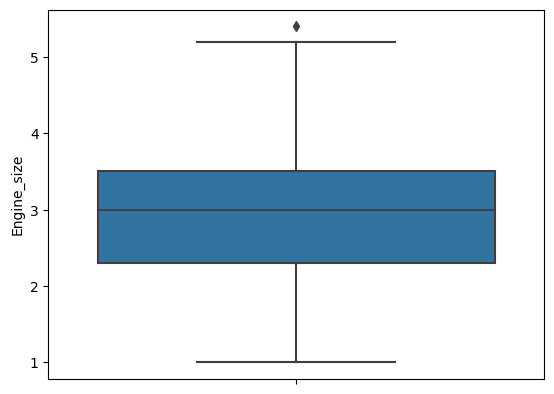

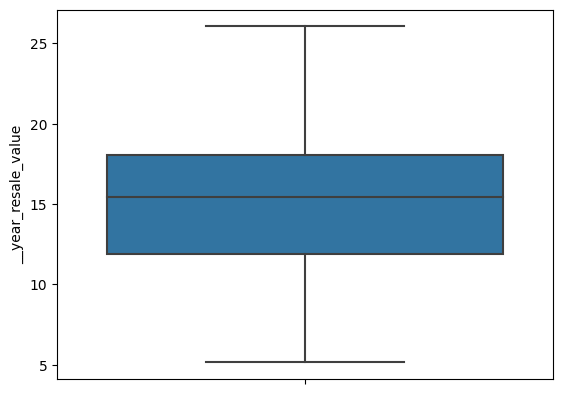

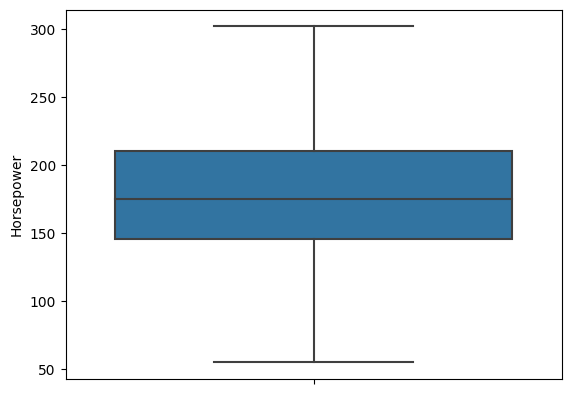

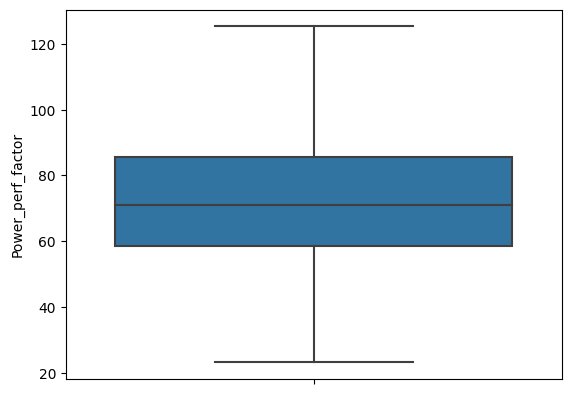

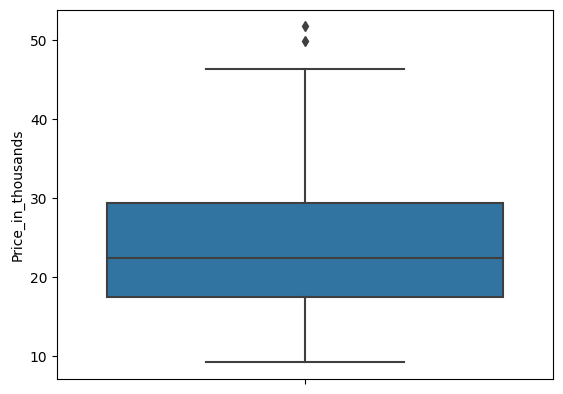

In [35]:
for i in regg_01:
    sns.boxplot(y=data[i])
    plt.show()

In [36]:
data.isnull().mean()*100

Manufacturer            0.000000
Model                   0.000000
Sales_in_thousands      0.000000
__year_resale_value    10.526316
Vehicle_type            0.000000
Price_in_thousands      5.921053
Engine_size             1.973684
Horsepower              1.973684
Wheelbase               0.000000
Width                   0.000000
Length                  0.000000
Curb_weight             2.631579
Fuel_capacity           0.000000
Fuel_efficiency         0.000000
Latest_Launch           0.000000
Power_perf_factor       4.605263
year                    0.000000
month                   0.000000
day                     0.000000
dtype: float64

In [38]:
data.dropna(inplace=True)

In [42]:
data_reggression=data[['Curb_weight','Engine_size','__year_resale_value','Horsepower','Power_perf_factor','Price_in_thousands']]
data_reggression

,Curb_weight,Engine_size,__year_resale_value,Horsepower,Power_perf_factor,Price_in_thousands
0,2.639,1.8,16.360000,140.0,58.280150,21.50
1,3.517,3.2,19.875000,225.0,91.370778,28.40
4,2.998,1.8,22.255000,150.0,62.777639,23.99
5,3.561,2.8,23.555000,200.0,84.565105,33.95
7,3.179,2.5,18.072975,170.0,71.191207,26.99
...,...,...,...,...,...,...
152,3.042,1.9,18.072975,160.0,66.498812,24.40
153,3.208,2.4,18.072975,168.0,70.654495,27.50
154,3.259,2.4,18.072975,168.0,71.155978,28.80
155,3.601,2.3,18.072975,236.0,101.623357,45.50


In [43]:
x=data[['Curb_weight','Engine_size','__year_resale_value','Horsepower','Power_perf_factor']].values

In [45]:
y=data[['Price_in_thousands']].values

In [47]:
rs=RobustScaler()

In [48]:
x=rs.fit_transform(x)

In [49]:
models={"linearRegression":LinearRegression(),
       "Ridge":Ridge(),
       "Lasso":Lasso(),
       "LinearSVR":LinearSVR(),
       "DecisionTreeRegressor":DecisionTreeRegressor(),
       "AdaBoostRegressor":AdaBoostRegressor(),
       "RandomForestRegressor":RandomForestRegressor(random_state=0),
}

In [50]:
for name,model in models.items():
    scores=cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model: {}".format(name))
    rmse=np.sqrt(-scores)
    rmse_average=np.mean(rmse)
    print('Avg RMSE:',rmse_average)
    print("*"*100)

cross validation model: linearRegression
Avg RMSE: 1.9226270978646935e-08
****************************************************************************************************
cross validation model: Ridge
Avg RMSE: 3.08702172451673
****************************************************************************************************
cross validation model: Lasso
Avg RMSE: 3.9724672760434316
****************************************************************************************************
cross validation model: LinearSVR
Avg RMSE: 3.8923341559856666
****************************************************************************************************
cross validation model: DecisionTreeRegressor
Avg RMSE: 5.0151245004664755
****************************************************************************************************
cross validation model: AdaBoostRegressor
Avg RMSE: 4.286902859010752
*************************************************************************************************

##### using linear regression model

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [53]:
model_1=LinearRegression()

In [54]:
model_1.fit(x_train,y_train)

LinearRegression()

In [55]:
y_pred=model_1.predict(x_test)

In [56]:
Output=pd.DataFrame(zip(y_test,y_pred),columns=['actual','prediction'], dtype=float)

In [57]:
Output

,actual,prediction
0,14.460,14.460
1,26.249,26.249
2,18.890,18.890
3,18.575,18.575
4,31.750,31.750
5,22.368,22.368
6,42.800,42.800
7,27.500,27.500
8,19.047,19.047
9,12.640,12.640


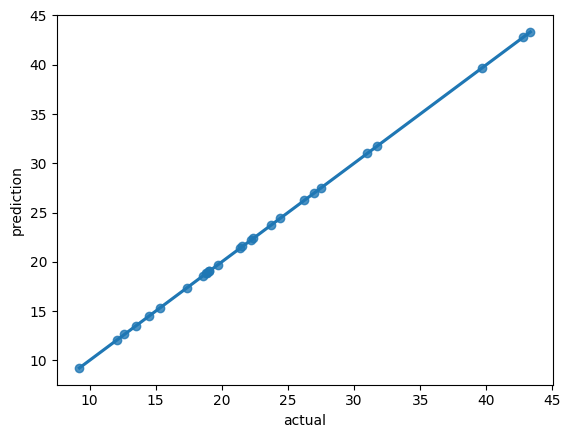

In [59]:
sns.regplot(data=Output,x='actual',y='prediction')
plt.show()

In [ ]:
100% accuracy

In [60]:
Output['Error'] = Output.actual - Output.prediction

In [61]:
Output

,actual,prediction,Error
0,14.460,14.460,-3.189903e-09
1,26.249,26.249,5.272920e-09
2,18.890,18.890,1.308379e-09
3,18.575,18.575,1.088796e-08
4,31.750,31.750,-1.139263e-08
5,22.368,22.368,1.741229e-08
6,42.800,42.800,9.016459e-08
7,27.500,27.500,8.591428e-09
8,19.047,19.047,-1.445720e-09
9,12.640,12.640,1.868891e-09


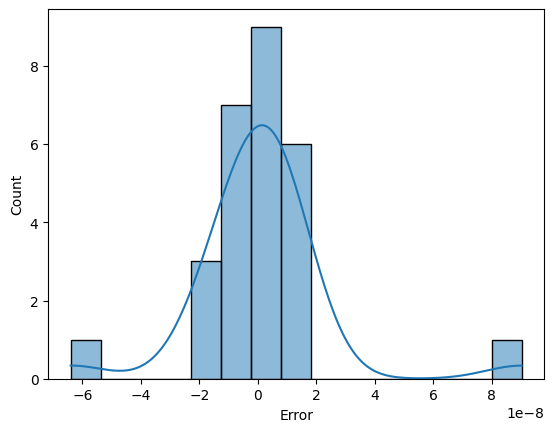

In [62]:
sns.histplot(data=Output, x='Error', kde=True)
plt.show()

In [64]:
data_reggression

,Curb_weight,Engine_size,__year_resale_value,Horsepower,Power_perf_factor,Price_in_thousands
0,2.639,1.8,16.360000,140.0,58.280150,21.50
1,3.517,3.2,19.875000,225.0,91.370778,28.40
4,2.998,1.8,22.255000,150.0,62.777639,23.99
5,3.561,2.8,23.555000,200.0,84.565105,33.95
7,3.179,2.5,18.072975,170.0,71.191207,26.99
...,...,...,...,...,...,...
152,3.042,1.9,18.072975,160.0,66.498812,24.40
153,3.208,2.4,18.072975,168.0,70.654495,27.50
154,3.259,2.4,18.072975,168.0,71.155978,28.80
155,3.601,2.3,18.072975,236.0,101.623357,45.50


In [69]:
model_1.score(x_train, y_train)

1.0

In [74]:
model_1.score(x_test, y_test)

1.0

Based on these results, we can draw the following conclusion:

High Accuracy: The model seems to be performing exceptionally well, with predictions almost identical to the actual values. The errors are extremely small, suggesting that the model is capturing the underlying patterns in the data accurately.

Perfect Fit: In some cases, the error is so close to zero that it might be due to numerical precision or floating-point rounding in the calculations. This indicates that the model is a perfect fit for the data, at least within the observed range.

Potential Overfitting: One possibility for such a perfect fit could be that the model is overfitting the training data. Overfitting occurs when the model learns the noise or random fluctuations in the training data instead of the underlying patterns. If the model is overfitting, it may not generalize well to new, unseen data.

Consider Evaluation Metrics: Even though the error values are extremely small, it's still a good practice to evaluate the model's performance using other metrics such as mean absolute error (MAE), mean squared error (MSE), or the coefficient of determination (R-squared) to get a more comprehensive view of its performance.

Additional Testing: To ensure the model's true effectiveness, it's essential to test it on a separate validation or test dataset to assess its performance on unseen data.

In summary, the current results suggest a highly accurate model, but it's important to remain cautious about potential overfitting and consider evaluating the model using other metrics and testing it on new data to confirm its robustness and generalization capabilities.